# Tugas Besar - IF2220 - Probabilitas dan Statistika
**Penarikan kesimpulan dan pengujian hipotesis**

Enam Langkah Testing:
1. Tentukan Hipotesis nol $(H_0: θ = θ_0)$, dimana $θ$ bisa berupa $μ$, $σ^2$, $p$, atau data lain berdistribusi tertentu (normal, binomial, dsc.).

2. Pilih hipotesis alternatif $H_1$ salah dari dari $θ > θ_0$, $θ < θ_0$, atau $θ ≠ θ_0$
3. Tentukan tingkat signifikan $α$.
4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis.
5. Hitung nilai uji statistik dari data sample. Hitung $p$-value sesuai dengan uji statistik yang digunakan.
6. Ambil keputusan dengan **TOLAK** $H_0$ jika nilai uji terletak di daerah kritis atau dengan tes signifikan, **TOLAK** $H_0$ jika $p$-value lebih kecil dibanding tingkat signifikansi $α$ yang diinginkan.



***
```

```

## Table of contents
1. Judul
2. Table of contents
3. Soal<br>
    3.1 [Menulis deskripsi statistika](#3.1.-Menulis-deskripsi-statistika-(Descriptive-Statistics))<br>
    3.2 [Membuat visualisasi plot distribusi](#3.2.-Membuat-visualisasi-plot-distribusi)<br>
    3.3 [Menentukan setiap kolom numerik berdistribusi normal atau tidak](#3.3.-Menentukan-setiap-kolom-numerik-berdistribusi-normal-atau-tidak)<br>
    3.4 [Melakukan test hipotesis 1 sampel dan menuliskan 6 langkah testing](#3.4.-Melakukan-test-hipotesis-1-sampel-dan-menuliskan-6-langkah-testing)<br>
    3.5 [Melakukan test hipotesis 2 sampel dan menuliskan 6 langkah testing](#3.5.-Melakukan-test-hipotesis-2-sampel-dan-menuliskan-6-langkah-testing)<br>
    3.6 [Test korelasi](#3.6.-Test-korelasi)<br>
4. Jawaban<br>
    4.1 [Menulis deskripsi statistika](#4.1.-Menulis-deskripsi-statistika-(Descriptive-Statistics))<br>
    4.2 [Membuat visualisasi plot distribusi](#4.2.-Membuat-visualisasi-plot-distribusi)<br>
    4.3 [Menentukan setiap kolom numerik berdistribusi normal atau tidak](#4.3.-Menentukan-setiap-kolom-numerik-berdistribusi-normal-atau-tidak)<br>
    4.4 [Melakukan test hipotesis 1 sampel dan menuliskan 6 langkah testing](#4.4.-Melakukan-test-hipotesis-1-sampel-dan-menuliskan-6-langkah-testing)<br>
    4.5 [Melakukan test hipotesis 2 sampel dan menuliskan 6 langkah testing](#4.5.-Melakukan-test-hipotesis-2-sampel-dan-menuliskan-6-langkah-testing)<br>
    4.6 [Test korelasi](#4.6.-Test-korelasi)<br>
5. Referensi

Catatan : Jika terdapat `<IPython.core.display.Markdown object>` dan tulisan tidak keluar, cobalah untuk `Run All` pada Jupyter.

***
```

```

## Soal
Diberikan sebuah data Gandum.csv yang dapat diakses pada utas berikut : [Dataset Tugas Besar IF2220](https://github.com/Lock1/Probstat-IF2220/blob/main/dataset/Gandum.csv). 

Gandum.csv merupakan data klasifikasi biji gandum yang mengandung 12 kolom sebagai berikut:
1. ID
2. Daerah
3. SumbuUtama
4. SumbuKecil
5. Keunikan
6. AreaBulatan
7. Diameter
8. KadarAir
9. Keliling
10. Bulatan
11. Ransum
12. Kelas

Kolom 2-11 adalah kolom atribut (non-target), sedangkan kolom 12 adalah kolom target.

Anda diminta untuk melakukan analisis statistika sebagai berikut :

### 3.1. Menulis deskripsi statistika (Descriptive Statistics)
Tuliskan descriptive statistics dari semua kolom pada data yang bersifat numerik, terdiri dari mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis. Boleh juga ditambahkan deskripsi lain.

### 3.2. Membuat visualisasi plot distribusi
Buatlah visualisasi dalam bentuk histogram dan boxplot untuk setiap
kolom numerik. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot
tersebut.

### 3.3. Menentukan setiap kolom numerik berdistribusi normal atau tidak 
Gunakan normality test yang dikaitkan dengan histogram plot.

### 3.4. Melakukan test hipotesis 1 sampel dan menuliskan 6 langkah testing 
Menampilkan juga boxplotnya untuk kolom / bagian yang bersesuaian.
1. Nilai rata-rata Daerah di atas 4700?
2. Nilai rata-rata Sumbu Utama tidak sama dengan 116?
3. Nilai rata-rata 20 baris pertama kolom Sumbu Kecil bukan 50?
4. Proporsi nilai Diameter yang lebih dari 85, adalah tidak sama dengan 15% ?
5. Proporsi nilai Keliling yang kurang dari 100, adalah kurang dari 5% ?

### 3.5. Melakukan test hipotesis 2 sampel dan menuliskan 6 langkah testing
Menampilkan juga boxplotnya untuk kolom / bagian yang bersesuaian.
1. Data kolom AreaBulatan dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?
2. Data kolom Kadar Air dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.2?
3. Rata-rata 20 baris pertama kolom Bulatan sama dengan 20 baris terakhirnya?
4. Proporsi nilai bagian awal Ransum yang lebih dari 2, adalah lebih besar daripada, proporsi nilai yang sama di bagian akhir Ransum?
5. Bagian awal kolom Diameter memiliki variansi yang sama dengan bagian akhirnya?

### 3.6. Test korelasi
Tentukan apakah setiap kolom non-target berkorelasi dengan kolom target, dengan menggambarkan juga scatter plot nya. Gunakan correlation test.

***
```





```

## Jawaban


### 4.1. Menulis deskripsi statistika (Descriptive Statistics)
Tuliskan descriptive statistics dari semua kolom pada data yang bersifat numerik, terdiri dari mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis. Boleh juga ditambahkan deskripsi lain.

***

In [54]:
# Load dataset
# import import_ipynb
from IPython.display import Markdown, display
from pandas import *
from matplotlib import *
import numpy as np
import seaborn as sns
original_dataset = read_csv("dataset/Gandum.csv")
dataset = original_dataset.drop(["ID", "Target"], axis=1)

def printMarkdown(rawString):
    display(Markdown(rawString))

# Print mean, std, min, max, quartile
printMarkdown("#### Mean, Standar deviasi, Minimum, Maximum, dan Kuartil")
dataset.describe()

#### Mean, Standar deviasi, Minimum, Maximum, dan Kuartil

,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,4801.246000,116.045171,53.715246,0.878764,4937.048000,77.771158,0.648372,281.479722,0.761737,2.150915
std,986.395491,18.282626,4.071075,0.036586,1011.696255,8.056867,0.094367,37.335402,0.061702,0.249767
min,2522.000000,74.133114,39.906517,0.719916,2579.000000,56.666658,0.409927,197.015000,0.174590,1.440796
25%,4042.750000,104.116098,51.193576,0.863676,4170.250000,71.745308,0.572632,255.883000,0.731991,1.983939
50%,4735.000000,115.405140,53.731199,0.890045,4857.000000,77.645277,0.626117,280.045500,0.761288,2.193599
75%,5495.500000,129.046792,56.325158,0.907578,5654.250000,83.648598,0.726633,306.062500,0.796361,2.381612
max,7453.000000,227.928583,68.977700,0.914001,7720.000000,97.413830,0.878899,488.837000,0.904748,2.464809


In [55]:
# Range, Variance, Median, Modus, IQR, Skewness, & Kurtosis 
printMarkdown("#### Range, Varians, Median, Modus, IQR, Skewness, dan Kurtosis")
describe_pandas = dataset.describe()

# Inisiasi dictionary
dictionary_gandum = {}
dictionary_gandum["Kolom"] = []
dictionary_gandum["Range"] = []
dictionary_gandum["Varians"] = []
dictionary_gandum["Median"] = []
dictionary_gandum["Modus"] = []
dictionary_gandum["IQR"] = []
dictionary_gandum["Skewness"] = []
dictionary_gandum["Kurtosis"] = []

# Menambahkan informasi ke dictionary
for column in describe_pandas:
    dictionary_gandum["Kolom"].append(column)
    # Range, Variance, Median, & Modus
    dictionary_gandum["Range"].append(describe_pandas[column]["max"] - describe_pandas[column]["min"])
    # | Range merupakan rentang nilai data
    dictionary_gandum["Varians"].append(dataset.var()[column])
    # | Varians adalah nilai bagaimana data tersebar
    dictionary_gandum["Median"].append(dataset.median()[column])
    # | Median adalah nilai tengah dari data, atau
    #    dapat diinterpretasikan terdapat tepat 
    #    50% data diatas dan dibawah data tersebut
    dictionary_gandum["Modus"].append(dataset.mode("index")[column][0])
    # | Modus urutan dari banyaknya kemunculan nilai
    # Note : Ambil hasil modus teratas dengan index 0
    
    # IQR, Skewness, & Kurtosis 
    dictionary_gandum["IQR"].append(describe_pandas[column]["75%"] - describe_pandas[column]["25%"])
    # | IQR adalah Selisih antara Q3 - Q1
    dictionary_gandum["Skewness"].append(dataset.skew()[column])
    # | Skewness adalah kecenderungan arah distribusi,
    #    dengan - menunjukan arah ke kanan dan sebaliknya
    dictionary_gandum["Kurtosis"].append(dataset.kurtosis()[column])
    # | Kurtosis dapat digunakan diinterpretasikan sebagai
    #    apakah distribusi memiliki banyak outlier atau tidak
    



# Perubahan dictionary ke dataframe dan menampilkannya
dataframe_gandum = DataFrame(dictionary_gandum, index=[i for i in range(1,11)])
display(dataframe_gandum)

#### Range, Varians, Median, Modus, IQR, Skewness, dan Kurtosis

,Kolom,Range,Varians,Median,Modus,IQR,Skewness,Kurtosis
1,Daerah,4931.000000,9.729761e+05,4735.000000,3992.000000,1452.750000,0.238144,-0.434631
2,SumbuUtama,153.795469,3.342544e+02,115.405140,74.133114,24.930694,0.761529,4.330534
3,SumbuKecil,29.071182,1.657365e+01,53.731199,39.906517,5.131582,-0.010828,0.475568
4,Keunikan,0.194085,1.338528e-03,0.890045,0.719916,0.043902,-1.623472,2.917256
5,AreaBulatan,5141.000000,1.023529e+06,4857.000000,3802.000000,1484.000000,0.257560,-0.409685
6,Diameter,40.747172,6.491311e+01,77.645277,71.293564,11.903290,0.002725,-0.466455
7,KadarAir,0.468972,8.905149e-03,0.626117,0.735849,0.154001,0.493661,-0.740326
8,Keliling,291.822000,1.393932e+03,280.045500,197.015000,50.179500,0.733627,2.272685
9,Bulatan,0.730158,3.807194e-03,0.761288,0.174590,0.064370,-3.599237,29.975096
10,Ransum,1.024013,6.238350e-02,2.193599,1.440796,0.397673,-0.658188,-0.428656


***
```





```

### 4.2. Membuat visualisasi plot distribusi
Buatlah visualisasi dalam bentuk histogram dan boxplot untuk setiap
kolom numerik. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot
tersebut.

***

#### Daerah
Distribusi data daerah cenderung normal dan tidak ada outlier yang dapat dilihat pada boxplot.

<AxesSubplot:>

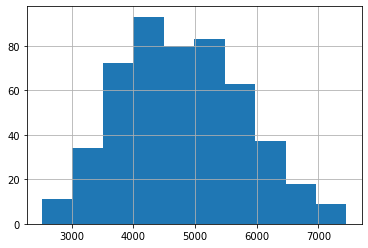

In [56]:
dataset["Daerah"].hist()

<AxesSubplot:>

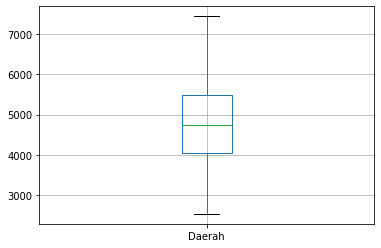

In [57]:
dataset.boxplot("Daerah")

***
```

```

#### SumbuUtama
Distribusi SumbuUtama terlihat normal meski terdapat satu outlier pada 220.

<AxesSubplot:>

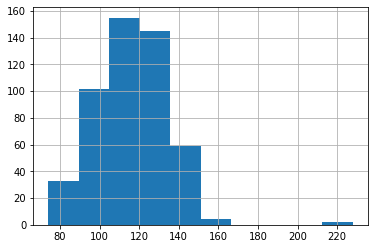

In [58]:
dataset["SumbuUtama"].hist()

<AxesSubplot:>

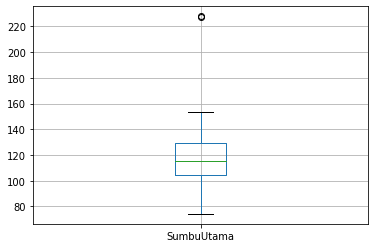

In [59]:
dataset.boxplot("SumbuUtama")

***
```

```

#### SumbuKecil
Pada histogram distribusi SumbuKecil terlihat normal, namun pada boxplot terlihat terdapat satu outlier yang terletak pada sekitar 230. Data terlihat memiliki kecenderungan standar deviasi yang kecil jika diamati dari histogram.

<AxesSubplot:>

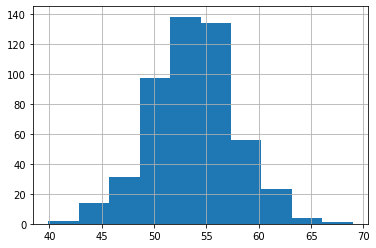

In [60]:
dataset["SumbuKecil"].hist()

<AxesSubplot:>

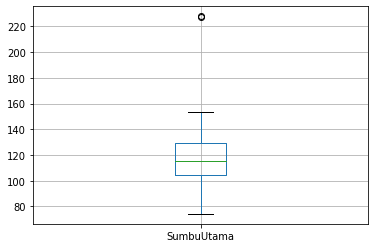

In [61]:
dataset.boxplot("SumbuUtama")

***
```

```

#### Keunikan
Distribusi Keunikan pada histogram terlihat seperti distribusi half-normal terbalik. Sebagian data juga terletak dibawah $Q_1 - 1.5IQR$ yang menyebabkan banyak data diklasifikasikan menjadi outlier pada boxplot.

<AxesSubplot:>

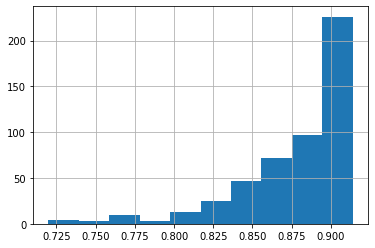

In [62]:
dataset["Keunikan"].hist()

<AxesSubplot:>

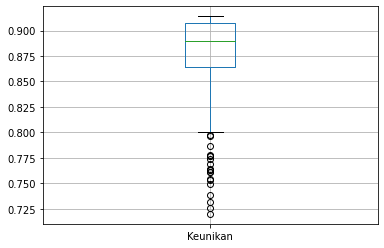

In [63]:
dataset.boxplot("Keunikan")

***
```

```

#### AreaBulatan
Distribusi AreaBulatan terlihat normal dan tidak ada outlier pada boxplot. Skewness terlihat cenderung positif dari histogram dan varians cenderung tinggi.

<AxesSubplot:>

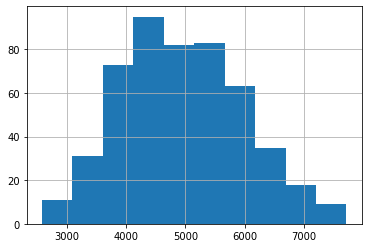

In [64]:
dataset["AreaBulatan"].hist()

<AxesSubplot:>

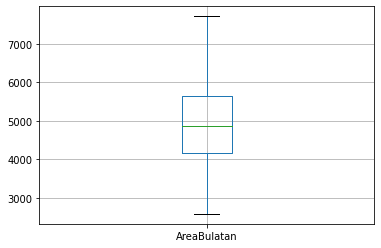

In [65]:
dataset.boxplot("AreaBulatan")

***
```

```

#### Diameter
Distribusi Diameter terlihat normal dan tidak ada outlier yang terlihat pada boxplot. Terlihat pada histogram standar deviasi data cukup besar sehingga data antara 70 dan 85 memiliki bentuk yang cenderung datar.

<AxesSubplot:>

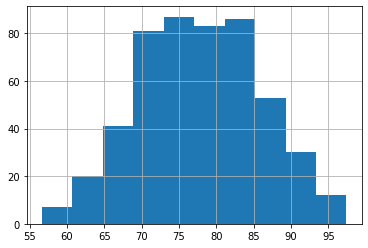

In [66]:
dataset["Diameter"].hist()

<AxesSubplot:>

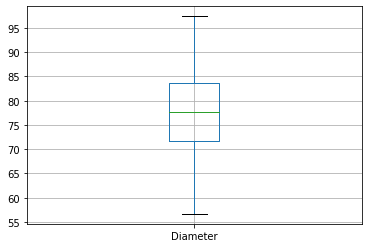

In [67]:
dataset.boxplot("Diameter")

***
```

```

#### KadarAir
Distribusi KadarAir terlihat seperti distribusi gamma dan $α$ yang cukup tinggi menyebabkan bentuk tajam keatas. Tidak ada outlier yang terlihat pada boxplot.

<AxesSubplot:>

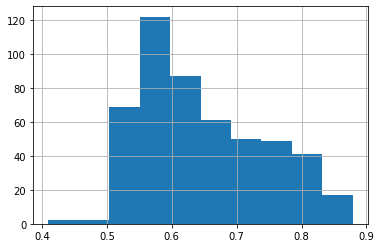

In [68]:
dataset["KadarAir"].hist()

<AxesSubplot:>

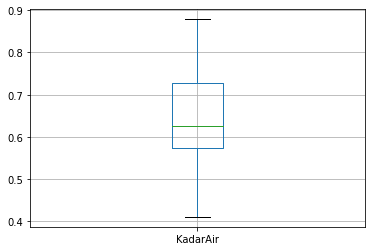

In [69]:
dataset.boxplot("KadarAir")

***
```

```

#### Keliling
Distribusi Keliling terlihat seperti distribusi normal meskipun terdapat beberapa outlier. Distribusi Keliling mungkin juga merupakan distribusi gamma jika sampel yang lebih besar menunjukan bahwa outlier-outlier tersebut masuk kedalam range $Q_3 + 1.5IQR$.

<AxesSubplot:>

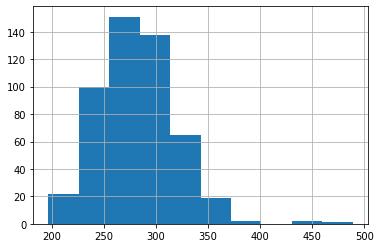

In [70]:
dataset["Keliling"].hist()

<AxesSubplot:>

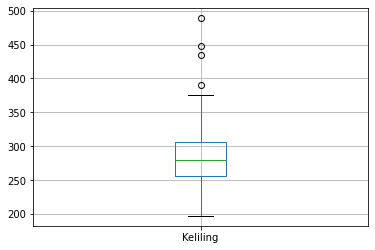

In [71]:
dataset.boxplot("Keliling")

***
```

```

#### Bulatan
Distribusi Bulatan terlihat seperti distribusi normal dengan standar deviasi yang besar. Mungkin juga distribusi bulatan merupakan distribusi gamma yang terbalik jika sampel yang diambil kurang merepresentasikan populasi.

<AxesSubplot:>

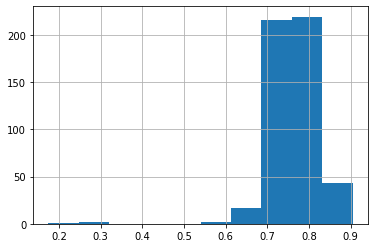

In [72]:
dataset["Bulatan"].hist()

<AxesSubplot:>

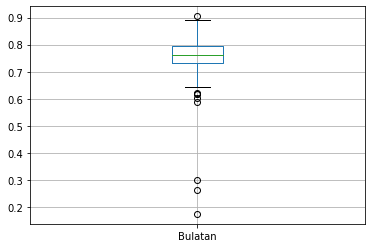

In [73]:
dataset.boxplot("Bulatan")

***
```

```

#### Ransum
Distribusi Ransum terlihat seperti distribusi half-normal terbalik. Pada boxplot tidak terlihat outlier.

<AxesSubplot:>

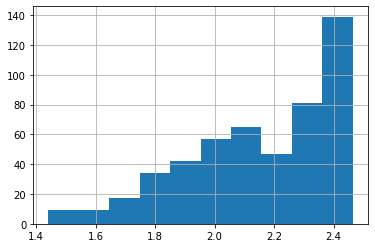

In [74]:
dataset["Ransum"].hist()

<AxesSubplot:>

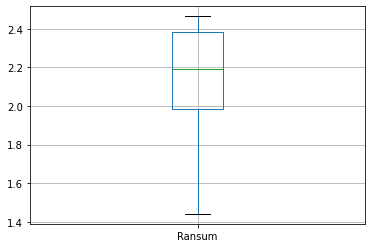

In [75]:
dataset.boxplot("Ransum")

***
```





```

### 4.3. Menentukan setiap kolom numerik berdistribusi normal atau tidak
Gunakan normality test yang dikaitkan dengan histogram plot.

#### Penjelasan D’Agostino’s and Pearson’s Omnibus Test Of Normality
Normality test dilakukan dengan menggabungkan variabel skewness dan kurtosis pada setiap kolom.
Apabila hasil tes menyimpulkan distribusi normal, maka pada histogram plot (yang dalam hal ini divisualisasikan
dengan `seaborn.distplot()`) akan tergambar bell-shaped curve (kurva mirip bentuk bell).

Pada tes omnibus ini, $K^2 = Z_s^2 + Z_k^2$. $Z_s$ merupakan hasil dari tes Skewness Agostino dan $Z_k$ merupakan
hasil tes Kurtosis Agostino. $K^2$ diaproksimasi terdistribusi secara $\chi^2$ (chi-squared) dengan 2 degrees of freedom.

Hipotesis null $H_0$ dalam test ini adalah diasumsikan bahwa masing-masing kolom memiliki distribusi normal.
Normality test akan menghasilkan dua output, yaitu stat dan $p$. Apabila nilai $p > \alpha$,
maka hasil test gagal untuk menolak $H_0$, sehingga kolom dapat disimpulkan memiliki distribusi normal.
Sebaliknya apabila nilai $p \leq \alpha$, maka hasil test yang dilakukan berhasil menolak $H_0$, sehingga 
kolom yang bersangkutan dapat disimpulkan tidak memiliki distribusi normal.

Hasil tes untuk setiap kolom dapat dilihat di bawah, tes menggunakan nilai $\alpha = 0.05$. Apabila dilihat, maka kolom yang tergolong memiliki distribusi normal
melalui Omnibus Test Of Normality hanyalah kolom SumbuKecil. Hal ini sesuai dengan visualisasi pada histogram di mana 
memang hanya kolom SumbuKecil yang menyerupai bell-shape.

***

In [76]:
from scipy.stats import normaltest
# Penambahan warning suppresion pada seaborn FutureWarning
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

#### Daerah

<AxesSubplot:xlabel='Daerah', ylabel='Density'>

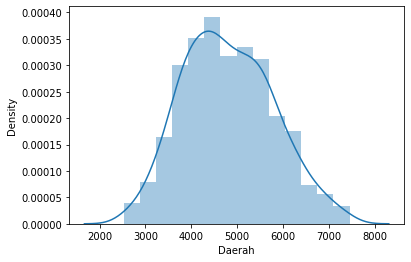

In [77]:
sns.distplot(dataset["Daerah"])

In [78]:
title = "**Daerah"
stat, p = normaltest(dataset["Daerah"])
printMarkdown("D’Agostino’s Test - stat = %.3f, $p$ = %f" % (stat, p))
if(p > 0.05):
    printMarkdown(title + " Berdistribusi Normal**")
else:
    printMarkdown(title + " Tidak Berdistribusi Normal**")

D’Agostino’s Test - stat = 10.859, $p$ = 0.004386

**Daerah Tidak Berdistribusi Normal**

***
```

```

#### SumbuUtama

<AxesSubplot:xlabel='SumbuUtama', ylabel='Density'>

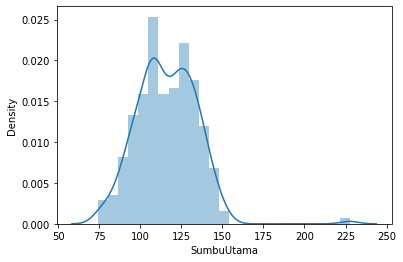

In [79]:
sns.distplot(dataset["SumbuUtama"])

In [80]:
title = "**SumbuUtama"
stat, p = normaltest(dataset["SumbuUtama"])
printMarkdown("D’Agostino’s Test - stat = %.3f, $p$ = %f" % (stat, p))
if(p > 0.05):
    printMarkdown(title + " Berdistribusi Normal**")
else:
    printMarkdown(title + " Tidak Berdistribusi Normal**")

D’Agostino’s Test - stat = 95.120, $p$ = 0.000000

**SumbuUtama Tidak Berdistribusi Normal**

***
```

```

#### SumbuKecil

<AxesSubplot:xlabel='SumbuKecil', ylabel='Density'>

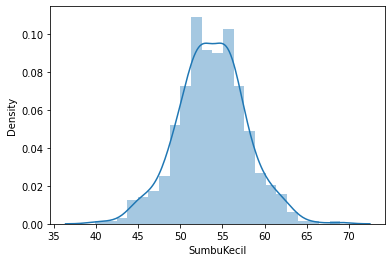

In [81]:
sns.distplot(dataset["SumbuKecil"])

In [82]:
title = "**SumbuKecil"
stat, p = normaltest(dataset["SumbuKecil"])
printMarkdown("D’Agostino’s Test - stat = %.3f, $p$ = %f" % (stat, p))
if(p > 0.05):
    printMarkdown(title + " Berdistribusi Normal**")
else:
    printMarkdown(title + " Tidak Berdistribusi Normal**")

D’Agostino’s Test - stat = 3.698, $p$ = 0.157363

**SumbuKecil Berdistribusi Normal**

***
```

```

#### Keunikan

<AxesSubplot:xlabel='Keunikan', ylabel='Density'>

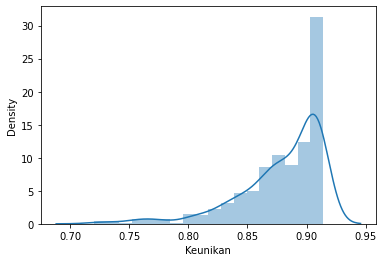

In [83]:
sns.distplot(dataset["Keunikan"])

In [84]:
title = "**Keunikan"
stat, p = normaltest(dataset["Keunikan"])
printMarkdown("D’Agostino’s Test - stat = %.3f, $p$ = %f" % (stat, p))
if(p > 0.05):
    printMarkdown(title + " Berdistribusi Normal**")
else:
    printMarkdown(title + " Tidak Berdistribusi Normal**")

D’Agostino’s Test - stat = 158.617, $p$ = 0.000000

**Keunikan Tidak Berdistribusi Normal**

***
```

```

#### AreaBulatan

<AxesSubplot:xlabel='AreaBulatan', ylabel='Density'>

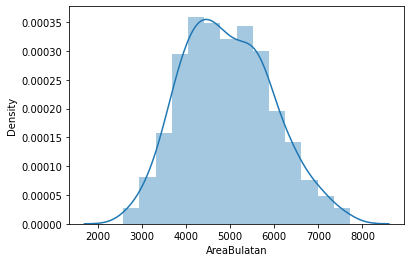

In [85]:
sns.distplot(dataset["AreaBulatan"])

In [86]:
title = "**AreaBulatan"
stat, p = normaltest(dataset["AreaBulatan"])
printMarkdown("D’Agostino’s Test - stat = %.3f, $p$ = %f" % (stat, p))
if(p > 0.05):
    printMarkdown(title + " Berdistribusi Normal**")
else:
    printMarkdown(title + " Tidak Berdistribusi Normal**")

D’Agostino’s Test - stat = 10.739, $p$ = 0.004657

**AreaBulatan Tidak Berdistribusi Normal**

***
```

```

#### Diameter

<AxesSubplot:xlabel='Diameter', ylabel='Density'>

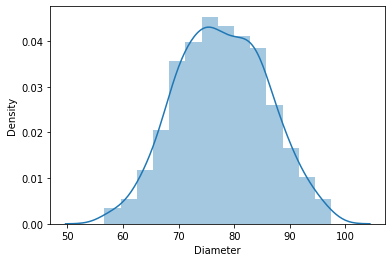

In [87]:
sns.distplot(dataset["Diameter"])

In [88]:
title = "**Diameter"
stat, p = normaltest(dataset["Diameter"])
printMarkdown("D’Agostino’s Test - stat = %.3f, $p$ = %f" % (stat, p))
if(p > 0.05):
    printMarkdown(title + " Berdistribusi Normal**")
else:
    printMarkdown(title + " Tidak Berdistribusi Normal**")

D’Agostino’s Test - stat = 7.446, $p$ = 0.024157

**Diameter Tidak Berdistribusi Normal**

***
```

```

#### KadarAir

<AxesSubplot:xlabel='KadarAir', ylabel='Density'>

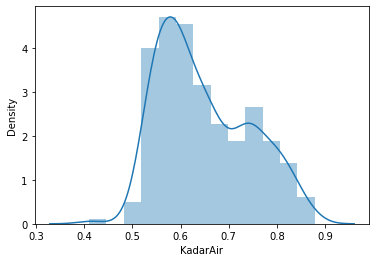

In [89]:
sns.distplot(dataset["KadarAir"])

In [90]:
title = "**KadarAir"
stat, p = normaltest(dataset["KadarAir"])
printMarkdown("D’Agostino’s Test - stat = %.3f, $p$ = %f" % (stat, p))
if(p > 0.05):
    printMarkdown(title + " Berdistribusi Normal**")
else:
    printMarkdown(title + " Tidak Berdistribusi Normal**")

D’Agostino’s Test - stat = 48.756, $p$ = 0.000000

**KadarAir Tidak Berdistribusi Normal**

***
```

```

####  Keliling

<AxesSubplot:xlabel='Keliling', ylabel='Density'>

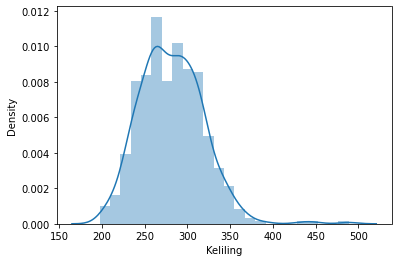

In [91]:
sns.distplot(dataset["Keliling"])

In [92]:
title = "**Keliling"
stat, p = normaltest(dataset["Keliling"])
printMarkdown("D’Agostino’s Test - stat = %.3f, $p$ = %f" % (stat, p))
if(p > 0.05):
    printMarkdown(title + " Berdistribusi Normal**")
else:
    printMarkdown(title + " Tidak Berdistribusi Normal**")

D’Agostino’s Test - stat = 67.465, $p$ = 0.000000

**Keliling Tidak Berdistribusi Normal**

***
```

```

#### Bulatan

<AxesSubplot:xlabel='Bulatan', ylabel='Density'>

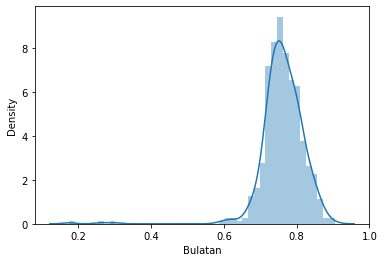

In [93]:
sns.distplot(dataset["Bulatan"])

In [94]:
title = "**Bulatan"
stat, p = normaltest(dataset["Bulatan"])
printMarkdown("D’Agostino’s Test - stat = %.3f, $p$ = %f" % (stat, p))
if(p > 0.05):
    printMarkdown(title + " Berdistribusi Normal**")
else:
    printMarkdown(title + " Tidak Berdistribusi Normal**")

D’Agostino’s Test - stat = 442.119, $p$ = 0.000000

**Bulatan Tidak Berdistribusi Normal**

***
```

```

#### Ransum

<AxesSubplot:xlabel='Ransum', ylabel='Density'>

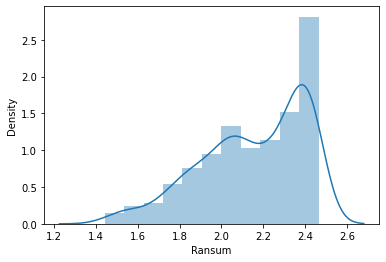

In [95]:
sns.distplot(dataset["Ransum"])

In [96]:
title = "**Ransum"
stat, p = normaltest(dataset["Ransum"])
printMarkdown("D’Agostino’s Test - stat = %.3f, $p$ = %f" % (stat, p))
if(p > 0.05):
    printMarkdown(title + " Berdistribusi Normal**")
else:
    printMarkdown(title + " Tidak Berdistribusi Normal**")

D’Agostino’s Test - stat = 37.060, $p$ = 0.000000

**Ransum Tidak Berdistribusi Normal**

***
```






```

### 4.4. Melakukan test hipotesis 1 sampel dan menuliskan 6 langkah testing 
Menampilkan juga boxplotnya untuk kolom / bagian yang bersesuaian.
1. Nilai rata-rata Daerah diatas $4700$?
2. Nilai rata-rata Sumbu Utama tidak sama dengan $116$?
3. Nilai rata-rata $20$ baris pertama kolom Sumbu Kecil bukan $50$?
4. Proporsi nilai Diameter yang lebih dari $85$, adalah tidak sama dengan $15\%$ ?
5. Proporsi nilai Keliling yang kurang dari $100$, adalah kurang dari $5\%$ ?

***

#### 4.4.1. Nilai rata-rata daerah diatas 4700?

Boxplot dari daerah

<AxesSubplot:>

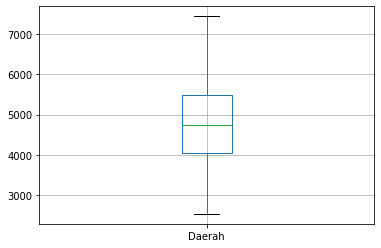

In [97]:
dataset.boxplot(["Daerah"])

1. **Hipotesis nol**

$H_0 : \mu_{daerah} = 4700$

2. **Hipotesis alternatif**

$H_1 : \mu_{daerah} > 4700$

3. **Tingkat signifikan**

$\alpha = 0.05$

4. **Penentuan uji statistik dan daerah kritis**

Diasumsikan kolom Daerah menuruti distribusi normal, dengan menggunakan nilai $\alpha$ yang lebih rendah untuk [normality test](#4.3.-Menentukan-setiap-kolom-numerik-berdistribusi-normal-atau-tidak). 

Karena kolom Daerah berdistribusi normal, dapat dilihat pada tabel distribusi normal untuk mendapatkan daerah kritis. Hipotesis yang diinginkan merupakan **one-tailed**.

![ztable](other/img/ztable.png)

Pada tabel terlihat $z$ bernilai sekitar $1.65$ untuk mendapatkan nilai kisaran $0.9505$.
Sehingga daerah kritis bernilai kisaran $c > 1.65$ untuk mendapatkan nilai $\alpha = 1 - 0.9505$ dan memenuhi hipotesis alternatif ($H_1 : \mu_{daerah} > 4700$).

5. **Perhitungan uji statistik dan $p$-value**

Berdasarkan statistik yang didapat pada [jawaban nomor pertama](#4.1.-Menulis-deskripsi-statistika-(Descriptive-Statistics)) didapatkan nilai $\sigma, \, \bar{x}, \, n$. Nilai $p$-value dihitung berdasarkan nilai uji statistik $z$.

$z = \Large\frac{\bar{x}-\mu_0}{\sigma / \sqrt{n}}, \, \normalsize\bar{x} = 4801.246000, \, \sigma = 986.395491, \, n = 500$

$z = \Large\frac{4801.246000-4700}{986.395491/\sqrt{500}}$

In [98]:
z = (4801.246-4700)/(986.395491/(500)**(0.5))
printMarkdown(f"$z = {z}$")

$z = 2.2951538253731125$

6. **Keputusan**

Nilai $z$ yang dihitung dari uji statistik menunjukan bahwa $z > c$ sehingga nilai uji terletak pada daerah kritis dan hipotesis nol ($H_0 : \mu = 4700$) **dapat ditolak**.

***
```

```

#### 4.4.2. Nilai rata-rata Sumbu Utama tidak sama dengan 116?

<AxesSubplot:>

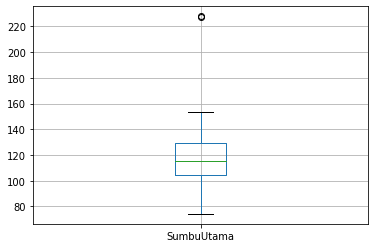

In [99]:
dataset.boxplot(["SumbuUtama"])

1. **Hipotesis nol**

$H_0 : \mu_{sumbu\, utama} = 116$

2. **Hipotesis alternatif**

$H_1 : \mu_{sumbu\, utama} \neq 116$

3. **Tingkat signifikan**

$\alpha = 0.05$

4. **Penentuan uji statistik dan daerah kritis**

Diasumsikan kolom SumbuUtama menuruti distribusi normal, dengan mengabaikan salah satu outlier yang terlihat pada [boxplot](#4.4.2.-Nilai-rata-rata-Sumbu-Utama-tidak-sama-dengan-116?).

Karena kolom SumbuUtama berdistribusi normal, dapat dilihat pada tabel distribusi normal untuk mendapatkan daerah kritis. Hipotesis yang diinginkan merupakan **two-tailed** dikarenakan tidak sama dengan hipotesis nol.

![ztable](other/img/ztable.png)

Pada tabel terlihat $z$ bernilai sekitar $1.96$ untuk mendapatkan nilai kisaran $0.975$.
Sehingga daerah kritis terletak kisaran $c > 1.96$ atau $c < -1.96$ untuk mendapatkan nilai $\alpha = 2(1 - 0.975)$ dan memenuhi hipotesis alternatif ($H_1 : \mu_{sumbu\, utama} \neq 116$).

5. **Perhitungan uji statistik dan $p$-value**

Berdasarkan statistik yang didapat pada [jawaban nomor pertama](#4.1.-Menulis-deskripsi-statistika-(Descriptive-Statistics)) didapatkan nilai $\sigma, \, \bar{x}, \, n$. Nilai $p$-value dihitung berdasarkan nilai uji statistik $z$.

$z = \Large\frac{\bar{x}-\mu_0}{\sigma / \sqrt{n}}, \, \normalsize\bar{x} = 116.045171, \, \sigma = 18.282626, \, n = 500$

$z = \Large\frac{116.045171-116}{18.282626/\sqrt{500}}$

In [100]:
z = (116.045171-116)/(18.282626/(500)**(0.5))
printMarkdown(f"$z = {z}$")

$z = 0.055246673323424506$

6. **Keputusan**

Nilai $z$ yang dihitung dari uji statistik menunjukan bahwa $z$ tidak terletak pada daerah kritis dan hipotesis nol ($H_0 : \mu_{sumbu\, utama} = 116$) **gagal untuk ditolak**.

***
```

```

#### 4.4.3. Nilai rata-rata 20 baris pertama kolom Sumbu Kecil bukan 50?

Boxplot untuk kolom SumbuKecil dan seluruh data pada dataset

<AxesSubplot:>

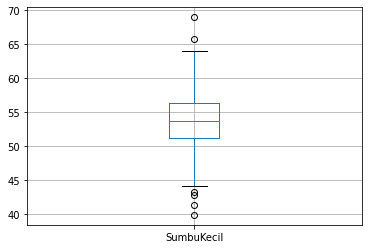

In [101]:
dataset.boxplot(["SumbuKecil"])

1. **Hipotesis nol**

$H_0 : \mu_{20\, baris\, pertama\, sumbu\, kecil} = 50$

2. **Hipotesis alternatif**

$H_1 : \mu_{20\, baris\, pertama\, sumbu\, kecil} \neq 50$

3. **Tingkat signifikan**

$\alpha = 0.05$

4. **Penentuan uji statistik dan daerah kritis**

Diasumsikan kolom SumbuKecil menuruti distribusi normal mengikuti hasil [normality test](#4.3.-Menentukan-setiap-kolom-numerik-berdistribusi-normal-atau-tidak).

Karena kolom SumbuKecil berdistribusi normal, dapat dilihat pada tabel distribusi normal untuk mendapatkan daerah kritis. Hipotesis yang diinginkan merupakan **two-tailed** dikarenakan tidak sama dengan hipotesis nol.

![ztable](other/img/ztable.png)

Pada tabel terlihat $z$ bernilai sekitar $1.96$ untuk mendapatkan nilai kisaran $0.975$.
Sehingga daerah kritis terletak kisaran $c > 1.96$ atau $c < -1.96$ untuk mendapatkan nilai $\alpha = 2(1 - 0.975)$ dan memenuhi hipotesis alternatif ($H_1 : \mu_{20\, baris\, pertama\, sumbu\, kecil} \neq 50$).

5. **Perhitungan uji statistik dan $p$-value**

Nilai $p$-value dihitung berdasarkan nilai uji statistik $z$.

Berikut adalah $20$ baris pertama dari dataset Gandum.csv

In [102]:
display(dataset.loc[:19])

,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum
0,5781,128.288875,58.470846,0.890095,5954,85.793926,0.674090,316.756,0.724041,2.194066
1,4176,109.348294,49.837688,0.890098,4277,72.918093,0.596231,260.346,0.774227,2.194088
2,4555,114.427991,52.151207,0.890105,4706,76.155145,0.776641,279.606,0.732159,2.194158
3,4141,108.701190,49.457349,0.890499,4236,72.611879,0.633180,260.478,0.766961,2.197877
4,5273,122.747868,55.757848,0.890876,5431,81.937733,0.669842,302.730,0.723031,2.201446
5,5371,123.943530,56.235398,0.891145,5531,82.695644,0.734144,297.114,0.764573,2.204013
6,6332,135.249060,61.312148,0.891344,6528,89.789492,0.579747,328.799,0.736020,2.205910
7,5595,126.292008,57.238214,0.891398,5745,84.402460,0.621046,303.285,0.764378,2.206428
8,4664,115.859780,52.493440,0.891471,4826,77.060945,0.712170,282.980,0.731909,2.207129
9,5762,128.482339,58.165177,0.891658,5932,85.652824,0.659872,312.678,0.740608,2.208922


Berikut adalah descriptive statistics dan boxplot untuk $20$ baris pertama dataset Gandum.csv

In [103]:
display(dataset.loc[:19].describe())

,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum
count,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,5125.750000,131.277042,54.887276,0.891701,5286.70000,80.628633,0.650385,295.174050,0.737535,2.209402
std,649.195687,33.714806,3.373880,0.001033,669.21408,5.163754,0.084203,20.430432,0.030385,0.009922
min,4141.000000,108.701190,49.457349,0.890095,4236.00000,72.611879,0.502630,260.346000,0.661849,2.194066
25%,4552.250000,115.167150,52.210008,0.891078,4748.75000,76.132143,0.592110,281.466000,0.722509,2.203371
50%,5311.000000,123.525993,55.855814,0.891680,5447.50000,82.231920,0.656115,298.546000,0.738314,2.209129
75%,5583.750000,127.055483,57.244755,0.892780,5770.00000,84.317548,0.683610,310.858500,0.764427,2.219795
max,6332.000000,227.928583,61.312148,0.893225,6528.00000,89.789492,0.833791,328.799000,0.780418,2.224152


<AxesSubplot:>

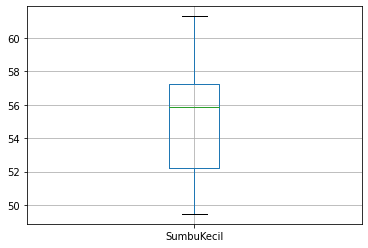

In [104]:
dataset.loc[:19].boxplot(["SumbuKecil"])

Nilai $\bar{x}, \, \sigma, \, n$ adalah

$\bar{x} = 54.887276, \, \sigma = 3.373880, \, n = 20$

$z = \Large\frac{\bar{x}-\mu_0}{\sigma / \sqrt{n}}, \, \normalsize$

$z = \Large\frac{54.887276-50}{3.373880/\sqrt{20}}$

In [105]:
z = (54.887276-50)/(3.373880/(20)**(0.5))
printMarkdown(f"$z = {z}$")

$z = 6.478168376352011$

6. **Keputusan**

Nilai $z$ yang dihitung dari uji statistik menunjukan bahwa $z$ terletak pada daerah kritis yakni $c > 1.96$ dan hipotesis nol ($H_0 : \mu_{20\, baris\, pertama\, sumbu\, kecil} = 50$) **dapat ditolak**.

***
```

```

##### 4.4.4. Proporsi nilai Diameter yang lebih dari 85, adalah tidak sama dengan 15% ?

Boxplot kolom Diameter

<AxesSubplot:>

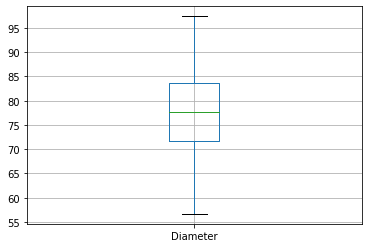

In [106]:
dataset.boxplot(["Diameter"])

<AxesSubplot:>

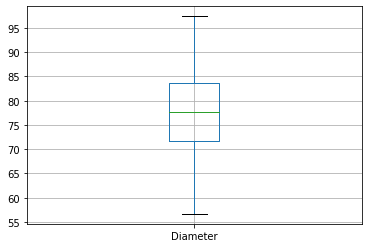

In [107]:
dataset.boxplot(["Diameter"])

1. **Hipotesis nol**

$X$ adalah variabel random Diameter.

$H_0 : P(X > 85) = 0.15$

2. **Hipotesis alternatif**

$H_1 : P(X > 85) \neq 0.15$

3. **Tingkat signifikan**

$\alpha = 0.05$

4. **Penentuan uji statistik dan daerah kritis**

Diasumsikan kolom Diameter menuruti distribusi normal, dengan menggunakan nilai $\alpha$ yang lebih rendah untuk [normality test](#4.3.-Menentukan-setiap-kolom-numerik-berdistribusi-normal-atau-tidak).

Karena kolom Diameter berdistribusi normal, dapat dilihat pada tabel distribusi normal untuk mendapatkan nilai probabilitas. Hipotesis yang diinginkan merupakan **two-tailed** dikarenakan tidak sama dengan hipotesis nol.

![ztable](other/img/ztable.png)


Pada tabel terlihat $z$ bernilai sekitar $1.96$ untuk mendapatkan nilai kisaran $0.975$.
Sehingga daerah kritis terletak kisaran $c > 1.96$ atau $c < -1.96$ untuk mendapatkan nilai $\alpha = 2(1 - 0.975)$ dan memenuhi hipotesis alternatif ($H_1 : P(X > 85) \neq 0.15$).

Hipotesis nol akan didasarkan dengan nilai uji statistik $z_t$ masuk ke dalam daerah kritis atau tidak. Nilai uji statistik $z_t$ dapat dihitung dengan

$z_t = \Large\frac{\hat{p} - p_{\normalsize0}}{\sqrt{\frac{p_{\normalsize0}(1 - p_{\normalsize0})}{n}}}$

Dengan $p_0$ adalah nilai proporsi dari hipotesis nol dan $\hat{p}$ adalah proporsi yang dihitung dari sampel.

5. **Perhitungan uji statistik dan $p$-value**

Berdasarkan statistik yang didapat pada [jawaban nomor pertama](#4.1.-Menulis-deskripsi-statistika-(Descriptive-Statistics)) didapatkan nilai $\sigma, \, \mu, \, n$.

$z = \Large\frac{x-\mu}{\sigma}, \, \normalsize\mu = 77.771158, \, \sigma = 8.056867, \, n = 500$

$z = \Large\frac{85-77.771158}{8.056867}$

In [108]:
z = (85-77.771158)/8.056867
printMarkdown(f"$z = {z}$")

$z = 0.8972274210310286$

Maka dari tabel didapatkan nilai probabilitas untuk $P(X < 85)$ adalah $0.8133$, sehingga untuk $P(X > 85)$ akan bernilai $\hat{p} = P(X > 85) = 1-0.8133 = 0.1867$

$\hat{p} = 0.1867$

Sehingga nilai uji statistik $z_t$ adalah

$z_t = \Large\frac{0.1867-0.15}{\sqrt{\frac{0.15(1-0.15)}{500}}}$

In [109]:
zt = (0.1867-0.15)/((0.15*0.85/500)**(0.5))
printMarkdown(f"$z_t = {zt}$")

$z_t = 2.298243148282499$

6. **Keputusan**

Nilai $z_t$ yang dihitung dari uji statistik menunjukan bahwa $z_t$ terletak pada daerah kritis yakni $c > 1.96$ sehingga hipotesis nol ($H_0 : P(X > 85) = 0.15$) **dapat ditolak**.

***
```

```

##### 4.4.5. Proporsi nilai Keliling yang kurang dari 100, adalah kurang dari 5% ?

Boxplot kolom Keliling

<AxesSubplot:>

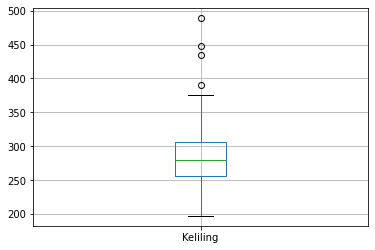

In [110]:
dataset.boxplot(["Keliling"])

1. **Hipotesis nol**

$X$ adalah variabel random Keliling.

$H_0 : P(X < 100) = 0.05$

2. **Hipotesis alternatif**

$H_1 : P(X < 100) < 0.05$

3. **Tingkat signifikan**

$\alpha = 0.05$

4. **Penentuan uji statistik dan daerah kritis**

Diasumsikan kolom Keliling menuruti distribusi normal, dengan mengabaikan outlier yang terlihat pada boxplot dan mengurangi nilai $\alpha$ pada [normality test](#4.3.-Menentukan-setiap-kolom-numerik-berdistribusi-normal-atau-tidak).

Karena kolom Keliling berdistribusi normal, dapat dilihat pada tabel distribusi normal untuk mendapatkan nilai probabilitas. Hipotesis yang diinginkan merupakan **one-tailed** dikarenakan kurang dari dengan hipotesis nol.

![ztable](other/img/ztable.png)

Pada tabel terlihat $z$ bernilai sekitar $1.65$ untuk mendapatkan nilai kisaran $0.9505$.
Sehingga daerah kritis terletak kisaran $c < -1.65$ untuk mendapatkan nilai $\alpha = 1 - 0.9505$ dan memenuhi hipotesis alternatif ($H_1 : P(X < 100) < 0.05$).

Hipotesis nol akan didasarkan dengan nilai uji statistik $z_t$ masuk ke dalam daerah kritis atau tidak. Nilai uji statistik $z_t$ dapat dihitung dengan

$z_t = \Large\frac{\hat{p} - p_{\normalsize0}}{\sqrt{\frac{p_{\normalsize0}(1 - p_{\normalsize0})}{n}}}$

Dengan $p_0$ adalah nilai proporsi dari hipotesis nol dan $\hat{p}$ adalah proporsi yang dihitung dari sampel.

5. **Perhitungan uji statistik dan $p$-value**

Berdasarkan statistik yang didapat pada [jawaban nomor pertama](#4.1.-Menulis-deskripsi-statistika-(Descriptive-Statistics)) didapatkan nilai $\sigma, \, \mu, \, n$.

$z = \Large\frac{x-\mu}{\sigma}, \, \normalsize\mu = 281.479722, \, \sigma = 37.335402, \, n = 500$

$z = \Large\frac{100-281.479722}{37.335402}$

In [111]:
z = (100-281.479722)/37.335402
printMarkdown(f"$z = {z}$")

$z = -4.860794642039745$

Maka dari tabel didapatkan nilai probabilitas untuk $P(X < 100)$ bernilai sangat kecil, sehingga $\hat{p}$ dapat dianggap bernilai $0$ untuk mempermudah perhitungan

$\hat{p} = 0$

Sehingga nilai uji statistik $z_t$ adalah

$z_t = \Large\frac{0-0.05}{\sqrt{\frac{0.05(1-0.05)}{500}}}$

In [112]:
zt = (-0.05)/((0.05*0.95/500)**(0.5))
printMarkdown(f"$z_t = {zt}$")

$z_t = -5.129891760425771$

6. **Keputusan**

Nilai $z_t$ yang dihitung dari uji statistik menunjukan bahwa $z_t$ terletak pada daerah kritis yakni $c < -1.65$ sehingga hipotesis nol ($H_0 : P(X > 85) = 0.15$) **dapat ditolak**.

***
```





```

### 4.5. Melakukan test hipotesis 2 sampel dan menuliskan 6 langkah testing
Menampilkan juga boxplotnya untuk kolom / bagian yang bersesuaian.
1. Data kolom AreaBulatan dibagi $2$ sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?
2. Data kolom Kadar Air dibagi $2$ sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar dari pada bagian akhir sebesar $0.2$?
3. Rata-rata $20$ baris pertama kolom Bulatan sama dengan $20$ baris terakhirnya?
4. Proporsi nilai bagian awal Ransum yang lebih dari $2$, adalah lebih besar daripada, proporsi nilai yang sama di bagian akhir Ransum?
5. Bagian awal kolom Diameter memiliki variansi yang sama dengan bagian akhirnya?

***

##### 4.5.1. Data kolom AreaBulatan dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?

Boxplot dan descriptive statistics AreaBulatan bagian pertama

<AxesSubplot:>

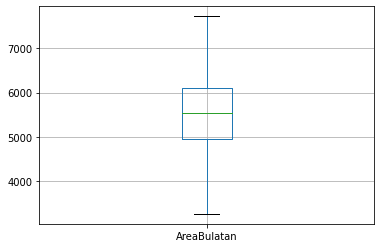

In [113]:
dataset.loc[:249].boxplot(["AreaBulatan"])

In [114]:
dataset.loc[:249].describe()

,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,5394.136000,128.973929,54.378581,0.904826,5549.804000,82.613746,0.635743,305.125020,0.728154,2.357643
std,845.269999,14.093670,4.203742,0.013431,867.025436,6.570311,0.095096,29.637571,0.051092,0.094939
min,3136.000000,92.229316,41.436419,0.719916,3270.000000,63.189233,0.418947,234.781000,0.261297,1.440796
25%,4817.000000,122.008029,51.753392,0.901810,4961.250000,78.314712,0.553903,286.563500,0.718566,2.314103
50%,5444.500000,128.659787,54.507285,0.907613,5551.000000,83.259548,0.611873,304.742500,0.735247,2.382048
75%,5940.000000,135.848720,57.150251,0.910973,6093.750000,86.965749,0.712129,320.882750,0.752251,2.424445
max,7453.000000,227.928583,64.012769,0.914001,7720.000000,97.413830,0.878899,448.305000,0.785460,2.464809


Boxplot dan descriptive statistics AreaBulatan bagian kedua

<AxesSubplot:>

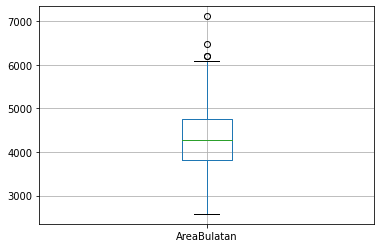

In [115]:
dataset.loc[250:].boxplot(["AreaBulatan"])

In [116]:
dataset.loc[250:].describe()

,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,4208.356000,103.116414,53.051911,0.852702,4324.292000,72.928570,0.661000,257.834424,0.795321,1.944187
std,727.679702,11.643519,3.828688,0.033736,738.566466,6.310964,0.092101,28.149351,0.052484,0.173747
min,2522.000000,74.133114,39.906517,0.725553,2579.000000,56.666658,0.409927,197.015000,0.174590,1.453137
25%,3733.500000,95.519781,50.797123,0.839186,3827.250000,68.946644,0.590431,240.300000,0.773805,1.838760
50%,4171.500000,104.332979,52.666834,0.863701,4283.000000,72.878794,0.634284,257.184000,0.796387,1.984110
75%,4622.500000,110.482779,55.658914,0.876217,4759.750000,76.717337,0.737766,272.856250,0.816398,2.075044
max,6946.000000,136.303603,68.977700,0.892647,7115.000000,94.042128,0.877897,488.837000,0.904748,2.218493


1. **Hipotesis nol**

$AreaBulatan1$ dan $AreaBulatan2$ menunjukan bagian awal dan akhir dari kolom AreaBulatan

$H_0 : \mu_{AreaBulatan1} = \mu_{AreaBulatan2}$

2. **Hipotesis alternatif**

$H_1 : \mu_{AreaBulatan1} \neq \mu_{AreaBulatan2}$

3. **Tingkat signifikan**

$\alpha = 0.05$

4. **Penentuan uji statistik dan daerah kritis**

Diasumsikan kolom AreaBulatan menuruti distribusi normal, dengan dan mengurangi nilai $\alpha$ pada [normality test](#4.3.-Menentukan-setiap-kolom-numerik-berdistribusi-normal-atau-tidak).

Untuk uji statistik 2 sampel digunakan $t$-distribution pada penghitungan uji statistik. Hipotesis yang diinginkan merupakan **two-tailed** dikarenakan tidak sama dengan hipotesis nol.

![ttable](other/img/ttable.jpg)

Karena derajat kebebasan tinggi, digunakan kalkulator untuk menemukan nilai kritis $t$. $t$ bernilai sekitar $1.965$ untuk mendapatkan $\alpha = 2\cdot0.025$.
Sehingga daerah kritis terletak kisaran $c < -1.965$ atau $c > 1.965$ untuk mendapatkan nilai $\alpha = 2\cdot0.025$ dan memenuhi hipotesis alternatif ($H_1 : \mu_{AreaBulatan1} \neq \mu_{AreaBulatan2}$).

Keputusan didasarkan nilai uji statistik $t$ berada dalam daerah kritis atau tidak. Perhitungan nilai uji statistik $t$ adalah sebagai berikut

$t = \Large\frac{(\bar{X_1} - \bar{X_2})-(\mu_1 - \mu_2)}{\sqrt{\Large\frac{\sigma_1^2}{\Large n_{\ 1}} + \Large\frac{\sigma_2^2}{\Large n_{\large 2}}}}$

Dengan $\bar{X}$ adalah rata-rata pada sampel.

5. **Perhitungan uji statistik dan $p$-value**

Berdasarkan hipotesis dan statistik yang didapat pada descriptive statistics yang dilakukan diatas

$\mu_1 - \mu_2 = 0$

$\bar{X_1} = 5549.804000, \, \bar{X_2} = 4324.292000$

$\sigma_1 = 867.025436, \, \sigma_2 = 738.566466$

$n_1 = 250, \, n_2 = 250$

In [117]:
# Student's t-distribution
def degreeFreedom(n1,n2):
    return n1+n2-2

def standardError(s1,s2,n1,n2):
    return (s1**2/n1 + s2**2/n2)**(0.5)

def tScore(X1, X2, mu1, mu2, s1, s2, n1, n2):
    return ((X1-X2)-(mu1-mu2))/standardError(s1,s2,n1,n2)

In [118]:
t = tScore(5549.804000, 4324.292000, 0, 0, 867.025436, 738.566466, 250, 250)
printMarkdown(f"$t = {t}$")

$t = 17.01303664239383$

6. **Keputusan**

Nilai $t$ yang dihitung dari uji statistik menunjukan bahwa $t$ terletak pada daerah kritis yakni $c > 1.96$ sehingga hipotesis nol ($H_0 : \mu_{AreaBulatan1} = \mu_{AreaBulatan2}$) **dapat ditolak**.

***
```

```

##### 4.5.2. Data kolom Kadar Air dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.2?

Boxplot dan descriptive statistics KadarAir bagian pertama

<AxesSubplot:>

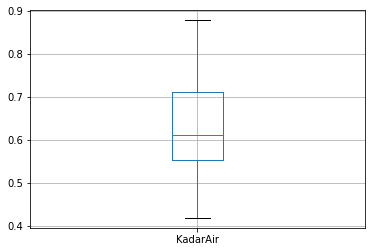

In [119]:
dataset.loc[:249].boxplot(["KadarAir"])

In [120]:
dataset.loc[:249].describe()

,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,5394.136000,128.973929,54.378581,0.904826,5549.804000,82.613746,0.635743,305.125020,0.728154,2.357643
std,845.269999,14.093670,4.203742,0.013431,867.025436,6.570311,0.095096,29.637571,0.051092,0.094939
min,3136.000000,92.229316,41.436419,0.719916,3270.000000,63.189233,0.418947,234.781000,0.261297,1.440796
25%,4817.000000,122.008029,51.753392,0.901810,4961.250000,78.314712,0.553903,286.563500,0.718566,2.314103
50%,5444.500000,128.659787,54.507285,0.907613,5551.000000,83.259548,0.611873,304.742500,0.735247,2.382048
75%,5940.000000,135.848720,57.150251,0.910973,6093.750000,86.965749,0.712129,320.882750,0.752251,2.424445
max,7453.000000,227.928583,64.012769,0.914001,7720.000000,97.413830,0.878899,448.305000,0.785460,2.464809


Boxplot dan descriptive statistics KadarAir bagian kedua

<AxesSubplot:>

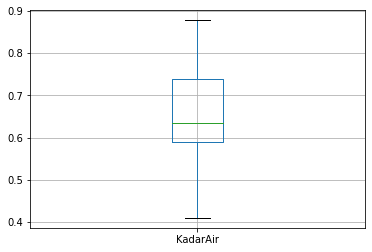

In [121]:
dataset.loc[250:].boxplot(["KadarAir"])

In [122]:
dataset.loc[250:].describe()

,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,4208.356000,103.116414,53.051911,0.852702,4324.292000,72.928570,0.661000,257.834424,0.795321,1.944187
std,727.679702,11.643519,3.828688,0.033736,738.566466,6.310964,0.092101,28.149351,0.052484,0.173747
min,2522.000000,74.133114,39.906517,0.725553,2579.000000,56.666658,0.409927,197.015000,0.174590,1.453137
25%,3733.500000,95.519781,50.797123,0.839186,3827.250000,68.946644,0.590431,240.300000,0.773805,1.838760
50%,4171.500000,104.332979,52.666834,0.863701,4283.000000,72.878794,0.634284,257.184000,0.796387,1.984110
75%,4622.500000,110.482779,55.658914,0.876217,4759.750000,76.717337,0.737766,272.856250,0.816398,2.075044
max,6946.000000,136.303603,68.977700,0.892647,7115.000000,94.042128,0.877897,488.837000,0.904748,2.218493


1. **Hipotesis nol**

$KadarAir1$ dan $KadarAir2$ menunjukan bagian awal dan akhir dari kolom KadarAir

$H_0 : \mu_{KadarAir1} = \mu_{KadarAir2} + 0.2$

2. **Hipotesis alternatif**

$H_1 : \mu_{KadarAir1} \neq \mu_{KadarAir2} + 0.2$

3. **Tingkat signifikan**

$\alpha = 0.05$

4. **Penentuan uji statistik dan daerah kritis**

Diasumsikan kolom KadarAir menuruti distribusi normal untuk mempermudah perhitungan.

Untuk uji statistik 2 sampel digunakan $t$-distribution pada penghitungan uji statistik. Hipotesis yang diinginkan merupakan **two-tailed** dikarenakan tidak sama dengan hipotesis nol.

![ttable](other/img/ttable.jpg)

Karena derajat kebebasan tinggi, digunakan kalkulator untuk menemukan nilai kritis $t$. $t$ bernilai sekitar $1.965$ untuk mendapatkan $\alpha = 2\cdot0.025$.
Sehingga daerah kritis terletak kisaran $c < -1.965$ atau $c > 1.965$ untuk mendapatkan nilai $\alpha = 2\cdot0.025$ dan memenuhi hipotesis alternatif ($H_1 : \mu_{KadarAir1} \neq \mu_{KadarAir2} + 0.2$).

Keputusan didasarkan nilai uji statistik $t$ berada dalam daerah kritis atau tidak. Perhitungan nilai uji statistik $t$ adalah sebagai berikut

$t = \Large\frac{(\bar{X_1} - \bar{X_2})-(\mu_1 - \mu_2)}{\sqrt{\Large\frac{\sigma_1^2}{\Large n_{\ 1}} + \Large\frac{\sigma_2^2}{\Large n_{\large 2}}}}$

Dengan $\bar{X}$ adalah rata-rata pada sampel.

5. **Perhitungan uji statistik dan $p$-value**

Berdasarkan hipotesis dan statistik yang didapat pada descriptive statistics yang dilakukan diatas

$\mu_1 - \mu_2 = 0$

$\bar{X_1} = 0.635743, \, \bar{X_2} = 0.661000$

$\sigma_1 = 0.095096, \, \sigma_2 = 0.092101$

$n_1 = 250, \, n_2 = 250$

In [123]:
t = tScore(0.635743, 0.661000, 0.2, 0, 0.095096, 0.092101, 250, 250)
printMarkdown(f"$t = {t}$")

$t = -26.903503315189987$

6. **Keputusan**

Nilai $t$ yang dihitung dari uji statistik menunjukan bahwa $t$ terletak pada daerah kritis yakni $c < -1.96$ sehingga hipotesis nol ($H_0 : \mu_{KadarAir1} = \mu_{KadarAir2} + 0.2$) **dapat ditolak**.

***
```

```

##### 4.5.3. Rata-rata 20 baris pertama kolom Bulatan sama dengan 20 baris terakhirnya?

Boxplot dan descriptive statistics Bulatan bagian pertama

<AxesSubplot:>

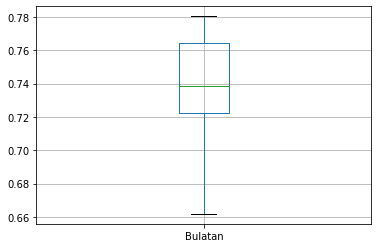

In [124]:
dataset.loc[:19].boxplot(["Bulatan"])

In [125]:
dataset.loc[:19].describe()

,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum
count,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,5125.750000,131.277042,54.887276,0.891701,5286.70000,80.628633,0.650385,295.174050,0.737535,2.209402
std,649.195687,33.714806,3.373880,0.001033,669.21408,5.163754,0.084203,20.430432,0.030385,0.009922
min,4141.000000,108.701190,49.457349,0.890095,4236.00000,72.611879,0.502630,260.346000,0.661849,2.194066
25%,4552.250000,115.167150,52.210008,0.891078,4748.75000,76.132143,0.592110,281.466000,0.722509,2.203371
50%,5311.000000,123.525993,55.855814,0.891680,5447.50000,82.231920,0.656115,298.546000,0.738314,2.209129
75%,5583.750000,127.055483,57.244755,0.892780,5770.00000,84.317548,0.683610,310.858500,0.764427,2.219795
max,6332.000000,227.928583,61.312148,0.893225,6528.00000,89.789492,0.833791,328.799000,0.780418,2.224152


Boxplot dan descriptive statistics Bulatan bagian kedua

<AxesSubplot:>

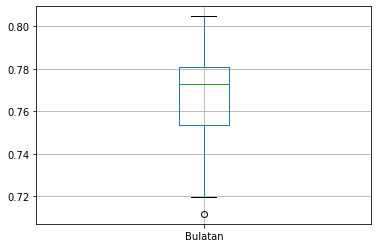

In [126]:
dataset.loc[480:].boxplot(["Bulatan"])

In [127]:
dataset.loc[480:].describe()

,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,4564.550000,113.170664,51.944126,0.888450,4682.600000,75.888929,0.664968,272.239650,0.767322,2.178936
std,859.446791,10.992566,5.091327,0.001642,877.517155,7.443539,0.104035,26.636919,0.025115,0.015165
min,2656.000000,86.567816,39.906517,0.885643,2721.000000,58.152594,0.528421,207.697000,0.711677,2.153467
25%,4097.250000,107.691641,49.238579,0.887318,4200.250000,72.226587,0.583148,257.799500,0.753426,2.168453
50%,4624.500000,114.461752,52.944960,0.888650,4776.500000,76.730879,0.646776,280.876500,0.773010,2.180614
75%,5109.250000,120.314391,55.009252,0.889657,5221.750000,80.654640,0.706628,287.667750,0.780859,2.189959
max,6063.000000,131.291578,60.178119,0.892647,6203.000000,87.861547,0.877897,313.372000,0.804733,2.218493


1. **Hipotesis nol**

$Bulatan1$ dan $Bulatan2$ menunjukan bagian $20$ baris awal dan $20$ baris akhir dari kolom Bulatan

$H_0 : \mu_{Bulatan1} = \mu_{Bulatan2}$

2. **Hipotesis alternatif**

$H_1 : \mu_{Bulatan1} \neq \mu_{Bulatan2}$

3. **Tingkat signifikan**

$\alpha = 0.05$

4. **Penentuan uji statistik dan daerah kritis**

Diasumsikan kolom Bulatan menuruti distribusi normal untuk mempermudah perhitungan.

Untuk uji statistik 2 sampel digunakan $t$-distribution pada penghitungan uji statistik. Hipotesis yang diinginkan merupakan **two-tailed** dikarenakan tidak sama dengan hipotesis nol.

![ttable](other/img/ttable.jpg)

Karena derajat kebebasan tinggi, digunakan kalkulator untuk menemukan nilai kritis $t$. $t$ bernilai sekitar $1.965$ untuk mendapatkan $\alpha = 2\cdot0.025$.
Sehingga daerah kritis terletak kisaran $c < -1.965$ atau $c > 1.965$ untuk mendapatkan nilai $\alpha = 2\cdot0.025$ dan memenuhi hipotesis alternatif ($H_1 : \mu_{Bulatan1} \neq \mu_{Bulatan2}$).

Keputusan didasarkan nilai uji statistik $t$ berada dalam daerah kritis atau tidak. Perhitungan nilai uji statistik $t$ adalah sebagai berikut

$t = \Large\frac{(\bar{X_1} - \bar{X_2})-(\mu_1 - \mu_2)}{\sqrt{\Large\frac{\sigma_1^2}{\Large n_{\ 1}} + \Large\frac{\sigma_2^2}{\Large n_{\large 2}}}}$

Dengan $\bar{X}$ adalah rata-rata pada sampel.

5. **Perhitungan uji statistik dan $p$-value**

Berdasarkan hipotesis dan statistik yang didapat pada descriptive statistics yang dilakukan diatas

$\mu_1 - \mu_2 = 0$

$\bar{X_1} = 0.737535, \, \bar{X_2} = 0.767322$

$\sigma_1 = 0.030385, \, \sigma_2 = 0.025115$

$n_1 = 20, \, n_2 = 20$

In [128]:
t = tScore(0.737535, 0.767322, 0, 0, 0.030385, 0.025115, 20, 20)
printMarkdown(f"$t = {t}$")

$t = -3.3792059099400866$

6. **Keputusan**

Nilai $t$ yang dihitung dari uji statistik menunjukan bahwa $t$ terletak pada daerah kritis yakni $c < -1.96$ sehingga hipotesis nol ($H_0 : \mu_{Bulatan1} = \mu_{Bulatan2}$) **dapat ditolak**.

***
```

```

##### 4.5.4. Proporsi nilai bagian awal Ransum yang lebih dari $2$, adalah lebih besar daripada, proporsi nilai yang sama di bagian akhir Ransum?

Boxplot dan descriptive statistics Ransum bagian kedua

<AxesSubplot:>

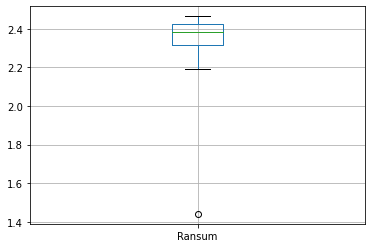

In [129]:
dataset.loc[:249].boxplot(["Ransum"])

In [130]:
dataset.loc[:249].describe()

,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,5394.136000,128.973929,54.378581,0.904826,5549.804000,82.613746,0.635743,305.125020,0.728154,2.357643
std,845.269999,14.093670,4.203742,0.013431,867.025436,6.570311,0.095096,29.637571,0.051092,0.094939
min,3136.000000,92.229316,41.436419,0.719916,3270.000000,63.189233,0.418947,234.781000,0.261297,1.440796
25%,4817.000000,122.008029,51.753392,0.901810,4961.250000,78.314712,0.553903,286.563500,0.718566,2.314103
50%,5444.500000,128.659787,54.507285,0.907613,5551.000000,83.259548,0.611873,304.742500,0.735247,2.382048
75%,5940.000000,135.848720,57.150251,0.910973,6093.750000,86.965749,0.712129,320.882750,0.752251,2.424445
max,7453.000000,227.928583,64.012769,0.914001,7720.000000,97.413830,0.878899,448.305000,0.785460,2.464809


Boxplot dan descriptive statistics Ransum bagian kedua

<AxesSubplot:>

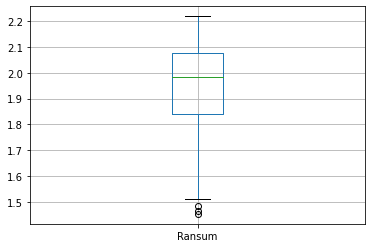

In [131]:
dataset.loc[250:].boxplot(["Ransum"])

In [132]:
dataset.loc[250:].describe()

,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,4208.356000,103.116414,53.051911,0.852702,4324.292000,72.928570,0.661000,257.834424,0.795321,1.944187
std,727.679702,11.643519,3.828688,0.033736,738.566466,6.310964,0.092101,28.149351,0.052484,0.173747
min,2522.000000,74.133114,39.906517,0.725553,2579.000000,56.666658,0.409927,197.015000,0.174590,1.453137
25%,3733.500000,95.519781,50.797123,0.839186,3827.250000,68.946644,0.590431,240.300000,0.773805,1.838760
50%,4171.500000,104.332979,52.666834,0.863701,4283.000000,72.878794,0.634284,257.184000,0.796387,1.984110
75%,4622.500000,110.482779,55.658914,0.876217,4759.750000,76.717337,0.737766,272.856250,0.816398,2.075044
max,6946.000000,136.303603,68.977700,0.892647,7115.000000,94.042128,0.877897,488.837000,0.904748,2.218493


1. **Hipotesis nol**

$Ransum1$ dan $Ransum2$ menunjukan bagian awal dan akhir dari kolom Ransum

$X$ adalah variabel random $Ransum1$ dan $Y$ adalah variabel random $Ransum2$.

$H_0 : P(X > 2) = P(Y > 2)$

2. **Hipotesis alternatif**

$H_1 : P(X > 2) < P(Y > 2)$

3. **Tingkat signifikan**

$\alpha = 0.05$

4. **Penentuan uji statistik dan daerah kritis**

Diasumsikan kolom Ransum menuruti distribusi normal untuk mempermudah perhitungan.

Untuk proporsi dua sampel digunakan tabel distribusi normal pada penghitungan uji statistik. Hipotesis yang diinginkan merupakan **one-tailed** dikarenakan kurang dari dengan hipotesis nol.

![ztable](other/img/ztable.png)

Pada tabel terlihat $z$ bernilai sekitar $1.65$ untuk mendapatkan nilai kisaran $0.9505$.
Sehingga daerah kritis terletak kisaran $c < -1.65$ untuk mendapatkan nilai $\alpha = 1 - 0.9505$ dan memenuhi hipotesis alternatif ($H_1 : P(X > 2) < P(Y > 2)$).

Hipotesis nol akan didasarkan dengan nilai uji statistik $z_t$ masuk ke dalam daerah kritis atau tidak. Nilai uji statistik $z_t$ dapat dihitung dengan

$z_t = \Large\frac{(\hat{p}_1 - \hat{p}_2) - (p_1 - p_2)}{\sqrt{\hat{p}_c(1-\hat{p}_c)(\frac{1}{n_1} + \frac{1}{n_2})}}$

$\hat{p}_c = \Large\frac{x_1 + x_2}{n_1 + n_2} $ 

Dengan $\hat{p}$ adalah proporsi sampel.

5. **Perhitungan uji statistik dan $p$-value**

Berdasarkan hipotesis dan statistik yang didapat pada descriptive statistics yang dilakukan diatas

$P(X > 2) = P(Y > 2) \Leftrightarrow p_1 = p_2 $

$\mu_1 = 2.357643, \, \mu_2 = 1.944187$

$\sigma_1 = 0.094939, \, \sigma_2 = 0.173747$

$n_1 = 250, \, n_2 = 250$

Perhitungan $\hat{p}_1$

In [133]:
lowerSectionCount = 0
for i in range(0, 250):
    if dataset["Ransum"][i] > 2:
        lowerSectionCount += 1

p1 = lowerSectionCount/250
printMarkdown("$\\hat{p}_1 = " + f"{p1}$")

$\hat{p}_1 = 0.996$

Perhitungan $\hat{p}_2$

In [134]:
upperSectionCount = 0
for i in range(250, 500):
    if dataset["Ransum"][i] > 2:
        upperSectionCount += 1

p2 = upperSectionCount/250
printMarkdown("$\\hat{p}_2 = " + f"{p2}$")

$\hat{p}_2 = 0.464$

Perhitungan $\hat{p}_c$

In [135]:
pc = (lowerSectionCount + upperSectionCount)/500
printMarkdown("$\\hat{p}_c = " + f"{pc}$")

$\hat{p}_c = 0.73$

In [136]:
zt = (p1-p2)/(pc*(1-pc)/125)**(0.5)
printMarkdown("$z_t = " + f"{zt}$")

$z_t = 13.397486455610238$

6. **Keputusan**

Nilai $z_t$ yang dihitung dari uji statistik menunjukan bahwa $z_t$ tidak terletak pada daerah kritis yakni $c < -1.65$ sehingga hipotesis nol ($H_0 : P(X > 2) = P(Y > 2)$) **gagal untuk ditolak**.

***
```

```

##### 4.5.5. Bagian awal kolom Diameter memiliki variansi yang sama dengan bagian akhirnya?

Boxplot dan descriptive statistics Diameter bagian kedua

<AxesSubplot:>

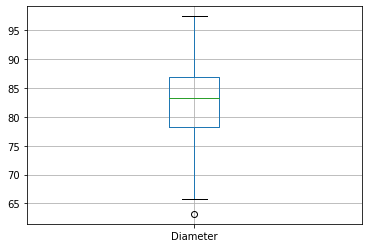

In [137]:
dataset.loc[:249].boxplot(["Diameter"])

In [138]:
dataset.loc[:249].describe()

,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,5394.136000,128.973929,54.378581,0.904826,5549.804000,82.613746,0.635743,305.125020,0.728154,2.357643
std,845.269999,14.093670,4.203742,0.013431,867.025436,6.570311,0.095096,29.637571,0.051092,0.094939
min,3136.000000,92.229316,41.436419,0.719916,3270.000000,63.189233,0.418947,234.781000,0.261297,1.440796
25%,4817.000000,122.008029,51.753392,0.901810,4961.250000,78.314712,0.553903,286.563500,0.718566,2.314103
50%,5444.500000,128.659787,54.507285,0.907613,5551.000000,83.259548,0.611873,304.742500,0.735247,2.382048
75%,5940.000000,135.848720,57.150251,0.910973,6093.750000,86.965749,0.712129,320.882750,0.752251,2.424445
max,7453.000000,227.928583,64.012769,0.914001,7720.000000,97.413830,0.878899,448.305000,0.785460,2.464809


Boxplot dan descriptive statistics Diameter bagian kedua

<AxesSubplot:>

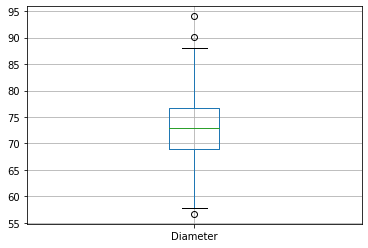

In [139]:
dataset.loc[250:].boxplot(["Diameter"])

In [140]:
dataset.loc[250:].describe()

,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,4208.356000,103.116414,53.051911,0.852702,4324.292000,72.928570,0.661000,257.834424,0.795321,1.944187
std,727.679702,11.643519,3.828688,0.033736,738.566466,6.310964,0.092101,28.149351,0.052484,0.173747
min,2522.000000,74.133114,39.906517,0.725553,2579.000000,56.666658,0.409927,197.015000,0.174590,1.453137
25%,3733.500000,95.519781,50.797123,0.839186,3827.250000,68.946644,0.590431,240.300000,0.773805,1.838760
50%,4171.500000,104.332979,52.666834,0.863701,4283.000000,72.878794,0.634284,257.184000,0.796387,1.984110
75%,4622.500000,110.482779,55.658914,0.876217,4759.750000,76.717337,0.737766,272.856250,0.816398,2.075044
max,6946.000000,136.303603,68.977700,0.892647,7115.000000,94.042128,0.877897,488.837000,0.904748,2.218493


1. **Hipotesis nol**

$Diameter1$ dan $Diameter2$ menunjukan bagian awal dan akhir dari kolom Diameter

$H_0 : \sigma^2_{Diameter1} = \sigma^2_{Diameter2}$

2. **Hipotesis alternatif**

$H_1 : \sigma^2_{Diameter1} \neq \sigma^2_{Diameter2}$

3. **Tingkat signifikan**

$\alpha = 0.05$

4. **Penentuan uji statistik dan daerah kritis**

Diasumsikan kolom Diameter menuruti distribusi normal untuk mempermudah perhitungan.

Tes varians digunakan tabel $F$-distribution pada penghitungan uji statistik. Hipotesis yang diinginkan merupakan **two-tailed** dikarenakan tidak sama dengan hipotesis nol.

![ftable](other/img/ftable.png)

Karena derajat kebebasan tinggi, digunakan kalkulator untuk mendapatkan nilai $f$. $f$ bernilai sekitar $1.28$ untuk mendapatkan nilai kisaran $0.975$.
Sehingga daerah kritis terletak kisaran $c > 1.28$ atau $c < \frac{1}{1.28}$ untuk mendapatkan nilai $\alpha = 1 - 0.975$ dan memenuhi hipotesis alternatif ($H_1 : \sigma^2_{Diameter1} \neq \sigma^2_{Diameter2}$).

Hipotesis nol akan didasarkan dengan nilai uji statistik $F_c$ masuk ke dalam daerah kritis atau tidak. Nilai uji statistik $F_c$ dapat dihitung dengan

$F_c = \Large\frac{\sigma_2^2}{\sigma_1^2}$

5. **Perhitungan uji statistik dan $p$-value**

Berdasarkan hipotesis dan statistik yang didapat pada descriptive statistics yang dilakukan diatas

$\sigma_1 = 6.570311, \, \sigma_2 = 6.310964$

$n_1 = 250, \, n_2 = 250$

Perhitungan $F_c$

In [141]:
fc = 6.570311**2/6.310964**2
printMarkdown(f"$F_c = {fc}$")

$F_c = 1.083878117523831$

Batas bawah daerah kritis

In [142]:
printMarkdown(f"$c < {1/1.28}$")

$c < 0.78125$

6. **Keputusan**

Nilai $F_c$ yang dihitung dari uji statistik menunjukan bahwa $F_c$ tidak terletak pada daerah kritis yakni $c < 0.78125$ dan $c > 1.28$ sehingga hipotesis nol ($H_0 : \sigma^2_{Diameter1} = \sigma^2_{Diameter2}$) **gagal untuk ditolak**.

***
```





```

### 4.6. Test korelasi
Tentukan apakah setiap kolom non-target berkorelasi dengan kolom target, dengan menggambarkan juga scatter plot nya. Gunakan correlation test.

In [146]:
# Pengimportan library yang digunakan untuk tes korelasi
import numpy as np
import matplotlib.pyplot as plt
dataset = original_dataset

Test korelasi akan menghasilkan Pearson Correlation Coefficient $\rho_{X,Y}$ untuk suatu random variable $X$ dan $Y$ yang memiliki rentang nilai $-1 \geq \rho_{X,Y}\geq 1$.
- Bila mendekati $1$, maka variabel $X$ dan $Y$ berkolerasi berbanding lurus.
- Bila mendekati $0$, maka variabel $X$ dan $Y$  tidak berkolerasi.
- Bila mendekati $-1$, maka variabel $X$ dan $Y$  berkolerasi berbanding terbalik.

#### Klasifikasi
- **Perfect**
  - Koefisien bernilai tepat $\pm 1$, dapat dikatakan sebagai perfect correlation
- **High degree**
  - Koefisien bernilai $0.5 \leq | \rho_{X,Y} | < 1$, dapat dikatakan sebagai strong correlation.
- **Moderate degree**
  - Koefisien bernilai $0.3 \leq | \rho_{X,Y} | < 0.5$, dapat dikatakan sebagai medium correlation.
- **Low degree**
  - Koefisien bernilai  $0 < | \rho_{X,Y} | < 0.3$, dapat dikatakan sebagai small correlation.
- **No correlation**
  - Koefisien bernilai tepat $0$, dapat dikatakan sebagai no correlation.

***
#### Daerah

Kolom Daerah dengan kolom target

$\rho_{X,Y} = -0.6027466517416661$

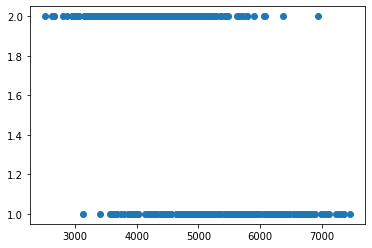

In [147]:
printMarkdown("Kolom Daerah dengan kolom target")
rho = np.corrcoef(dataset["Daerah"], dataset["Target"])
printMarkdown("$\\rho_{X,Y} = " + str(rho[0][1]) + "$") # rho[0][1] = rho[1][0]. Dipilih satu untuk ditampilkan
print()
plt.scatter(dataset["Daerah"], dataset["Target"])

Dari nilai koefisien Pearson dan Scatterplot di atas, maka dapat disimpulkan bahwa kolom Daerah dan Target
berkorelasi **berbanding terbalik** secara **strong correlation**.

<AxesSubplot:xlabel='Daerah', ylabel='Target'>

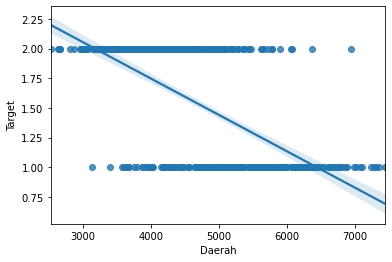

In [148]:
# Dapat dilihat lebih jelas pada regplot berikut:
sns.regplot(dataset["Daerah"], dataset["Target"])

***
```

```

#### SumbuUtama

Kolom SumbuUtama dengan kolom target

$\rho_{X,Y} = -0.7130906104204593$

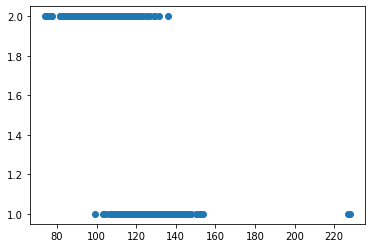

In [149]:
printMarkdown("Kolom SumbuUtama dengan kolom target")
rho = np.corrcoef(dataset["SumbuUtama"], dataset["Target"])
printMarkdown("$\\rho_{X,Y} = " + str(rho[0][1]) + "$") # rho[0][1] = rho[1][0]. Dipilih satu untuk ditampilkan
print()
plt.scatter(dataset["SumbuUtama"], dataset["Target"])

Dari nilai koefisien Pearson dan Scatterplot di atas, maka dapat disimpulkan bahwa kolom SumbuUtama dan Target 
berkorelasi **berbanding terbalik** secara **strong correlation**.

<AxesSubplot:xlabel='SumbuUtama', ylabel='Target'>

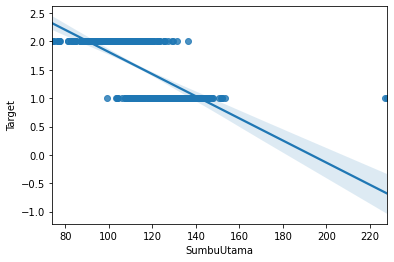

In [150]:
# Dapat dilihat lebih jelas pada regplot berikut:
sns.regplot(dataset["SumbuUtama"], dataset["Target"])

***
```

```

#### SumbuKecil

Kolom SumbuKecil dengan kolom target

$\rho_{X,Y} = -0.15297517335535027$

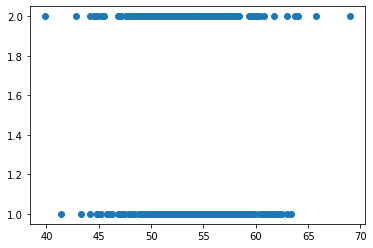

In [151]:
printMarkdown("Kolom SumbuKecil dengan kolom target")
rho = np.corrcoef(dataset["SumbuKecil"], dataset["Target"])
printMarkdown("$\\rho_{X,Y} = " + str(rho[0][1]) + "$") # rho[0][1] = rho[1][0]. Dipilih satu untuk ditampilkan
print()
plt.scatter(dataset["SumbuKecil"], dataset["Target"])

Dari nilai koefisien Pearson dan Scatterplot di atas, maka dapat disimpulkan bahwa kolom SumbuKecil dan Target 
berkorelasi **berbanding terbalik** secara **small correlation**.

<AxesSubplot:xlabel='SumbuKecil', ylabel='Target'>

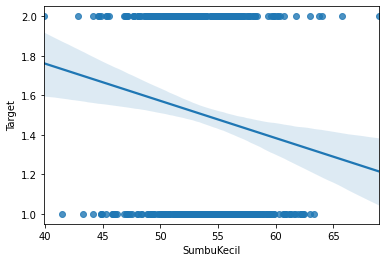

In [152]:
# Dapat dilihat lebih jelas pada regplot berikut:
sns.regplot(dataset["SumbuKecil"], dataset["Target"])

***
```

```

#### Keunikan

Kolom Keunikan dengan kolom target

$\rho_{X,Y} = -0.7304563686511923$

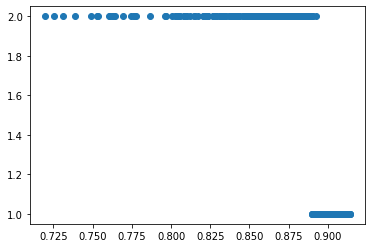

In [153]:
printMarkdown("Kolom Keunikan dengan kolom target")
rho = np.corrcoef(dataset["Keunikan"], dataset["Target"])
printMarkdown("$\\rho_{X,Y} = " + str(rho[0][1]) + "$") # rho[0][1] = rho[1][0]. Dipilih satu untuk ditampilkan
print()
plt.scatter(dataset["Keunikan"], dataset["Target"])

Dari nilai koefisien Pearson dan Scatterplot di atas, maka dapat disimpulkan bahwa kolom Keunikan dan Target berkorelasi **berbanding terbalik** secara **high degree**.

<AxesSubplot:xlabel='Keunikan', ylabel='Target'>

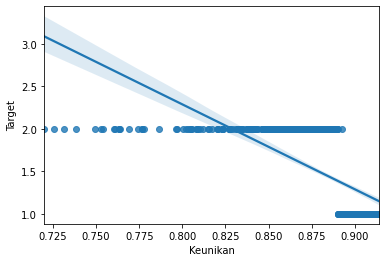

In [154]:
# Dapat dilihat lebih jelas pada regplot berikut:
sns.regplot(dataset["Keunikan"], dataset["Target"])

***
```

```

#### AreaBulatan

Kolom AreaBulatan dengan kolom target

$\rho_{X,Y} = -0.6073125434153751$

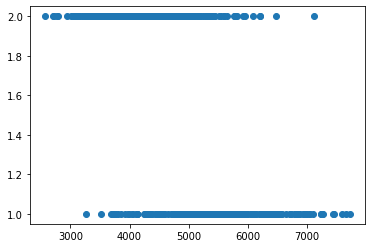

In [155]:
printMarkdown("Kolom AreaBulatan dengan kolom target")
rho = np.corrcoef(dataset["AreaBulatan"], dataset["Target"])
printMarkdown("$\\rho_{X,Y} = " + str(rho[0][1]) + "$") # rho[0][1] = rho[1][0]. Dipilih satu untuk ditampilkan
print()
plt.scatter(dataset["AreaBulatan"], dataset["Target"])

Dari nilai koefisien Pearson dan Scatterplot di atas, maka dapat disimpulkan bahwa kolom AreaBulatan dan Target berkorelasi **berbanding terbalik** secara **strong correlation**.

<AxesSubplot:xlabel='AreaBulatan', ylabel='Target'>

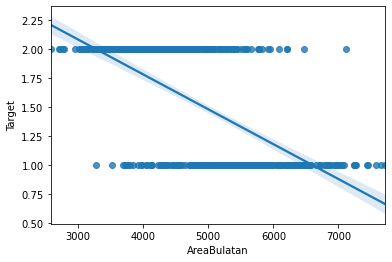

In [156]:
# Dapat dilihat lebih jelas pada regplot berikut:
sns.regplot(dataset["AreaBulatan"], dataset["Target"])

***
```

```

#### Diameter

Kolom Diameter dengan kolom target

$\rho_{X,Y} = -0.6025356896618813$

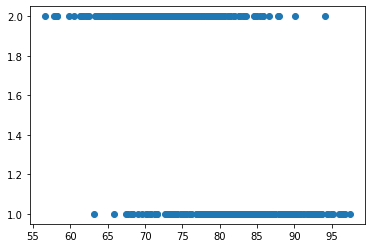

In [157]:
printMarkdown("Kolom Diameter dengan kolom target")
rho = np.corrcoef(dataset["Diameter"], dataset["Target"])
printMarkdown("$\\rho_{X,Y} = " + str(rho[0][1]) + "$") # rho[0][1] = rho[1][0]. Dipilih satu untuk ditampilkan
print()
plt.scatter(dataset["Diameter"], dataset["Target"])

Dari nilai koefisien Pearson dan Scatterplot di atas, maka dapat disimpulkan bahwa kolom Diameter dan Target berkorelasi **berbanding terbalik** secara **strong correlation**.

<AxesSubplot:xlabel='Diameter', ylabel='Target'>

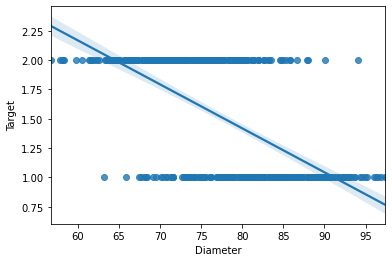

In [158]:
# Dapat dilihat lebih jelas pada regplot berikut:
sns.regplot(dataset["Diameter"], dataset["Target"])

***
```

```

#### KadarAir

Kolom KadarAir dengan kolom target

$\rho_{X,Y} = 0.13434422605727642$

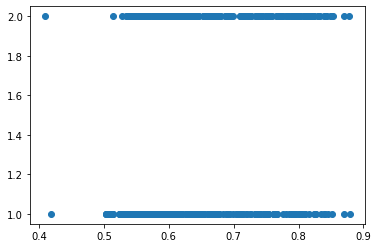

In [159]:
printMarkdown("Kolom KadarAir dengan kolom target")
rho = np.corrcoef(dataset["KadarAir"], dataset["Target"])
printMarkdown("$\\rho_{X,Y} = " + str(rho[0][1]) + "$") # rho[0][1] = rho[1][0]. Dipilih satu untuk ditampilkan
print()
plt.scatter(dataset["KadarAir"], dataset["Target"])

Dari nilai koefisien Pearson dan Scatterplot di atas, maka dapat disimpulkan bahwa kolom KadarAir dan Target berkorelasi **berbanding lurus** secara **small correlation**.

<AxesSubplot:xlabel='KadarAir', ylabel='Target'>

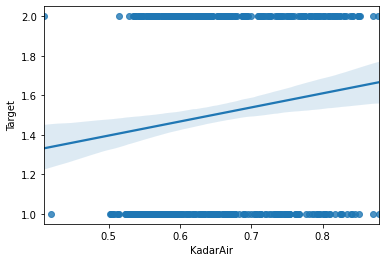

In [160]:
# Dapat dilihat lebih jelas pada regplot berikut:
sns.regplot(dataset["KadarAir"], dataset["Target"])

***
```

```

#### Keliling

Kolom Keliling dengan kolom target

$\rho_{X,Y} = -0.6348607454756855$

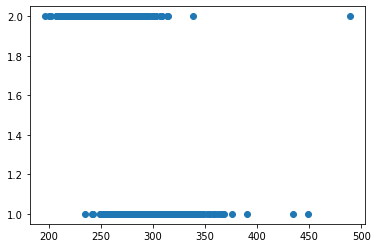

In [161]:
printMarkdown("Kolom Keliling dengan kolom target")
rho = np.corrcoef(dataset["Keliling"], dataset["Target"])
printMarkdown("$\\rho_{X,Y} = " + str(rho[0][1]) + "$") # rho[0][1] = rho[1][0]. Dipilih satu untuk ditampilkan
print()
plt.scatter(dataset["Keliling"], dataset["Target"])

***
```





```

## Referensi

Uji hipotesis<br>
https://en.wikipedia.org/wiki/Statistical_hypothesis_testing<br>
https://en.wikipedia.org/wiki/Lady_tasting_tea<br>
https://en.wikipedia.org/wiki/Neyman%E2%80%93Pearson_lemma<br>
https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/<br>
https://en.wikipedia.org/wiki/One-_and_two-tailed_tests<br>
https://en.wikipedia.org/wiki/Exclusion_of_the_null_hypothesis<br>
https://online.stat.psu.edu/statprogram/reviews/statistical-concepts/proportions<br>
https://www.jmp.com/en_ch/statistics-knowledge-portal/t-test/two-sample-t-test.html<br>
https://online.stat.psu.edu/stat800/lesson/5/5.5<br>

Library<br>
https://stackoverflow.com/questions/37947496/how-to-print-like-jupyter-notebooks-default-cell-output/37947698<br>
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html<br>

Korelasi dan uji distribusi normal<br>
https://en.wikipedia.org/wiki/Pearson_correlation_coefficient<br>
https://en.wikipedia.org/wiki/D%27Agostino%27s_K-squared_test<br>
https://en.wikipedia.org/wiki/Omnibus_test<br>